In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train["date"] = pd.to_datetime(df_train["date"])

/var/folders/k6/syjdq5zn2bx56p8jvvmbj_nr0000gn/T/ipykernel_94815/1170409513.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train["date"] = pd.to_datetime(df_train["date"])


In [4]:
df_train["day_of_week"] = df_train["date"].dt.day_name()

In [5]:
df_train["date"]

,id,date,country,store,product,num_sold,day_of_week
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,Friday
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,Friday
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,Friday
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,Friday
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,Friday
...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,Saturday
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,Saturday
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,Saturday
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,Saturday


In [8]:
df_train["day_of_year"] = df_train["date"].dt.strftime("%m-%d")


In [9]:
df_train

,id,date,country,store,product,num_sold,day_of_week,day_of_year
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,Friday,01-01
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,Friday,01-01
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,Friday,01-01
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,Friday,01-01
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,Friday,01-01
...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,Saturday,12-31
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,Saturday,12-31
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,Saturday,12-31
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,Saturday,12-31


In [10]:
df_train.groupby(["day_of_year","country"]).num_sold.sum()

day_of_year  country  
01-01        Canada        95380.0
             Finland       98422.0
             Italy         70748.0
             Kenya          2361.0
             Norway       185566.0
                            ...   
12-31        Finland      102892.0
             Italy         73031.0
             Kenya          2494.0
             Norway       189835.0
             Singapore    111120.0
Name: num_sold, Length: 2196, dtype: float64

<Figure size 1500x800 with 0 Axes>

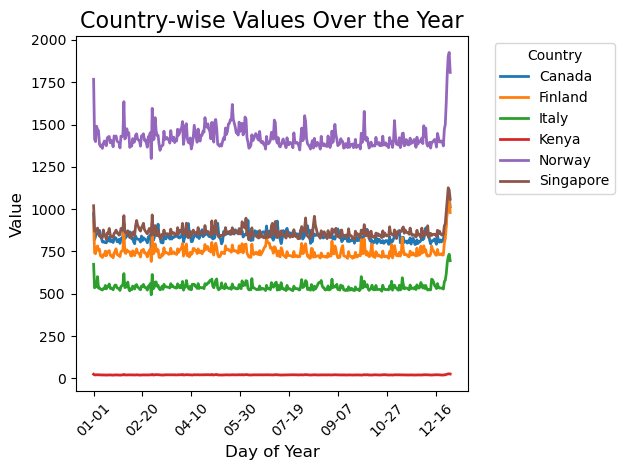

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a pandas DataFrame called 'df'
# Create a pivot table with 'day_of_year' as the index and 'country' as columns

pivot_df = df_train.pivot_table(index='day_of_year', columns='country', values='num_sold')

# Plot the data

plt.figure(figsize=(15, 8))

# Line plot
pivot_df.plot(kind='line', linewidth=2)

plt.title('Country-wise Values Over the Year', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
#missing values
df_train.isnull().sum()

id                0
date              0
country           0
store             0
product           0
num_sold       8871
day_of_week       0
day_of_year       0
dtype: int64

In [13]:
df_train.country.value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [14]:
df_train.store.value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [15]:
df_train["product"].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

## Cleaned data after handling missing values 

In [17]:
data2 = pd.read_excel("train_1.xlsx")
data2.drop(columns=["Unnamed: 0"],inplace = True)

In [18]:
data2

,id,date,country,store,product,num_sold,day_of_week,day_of_year
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,0,Friday,01-01
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973,Friday,01-01
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906,Friday,01-01
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423,Friday,01-01
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491,Friday,01-01
...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466,Saturday,12-31
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907,Saturday,12-31
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299,Saturday,12-31
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242,Saturday,12-31


In [19]:
%pip install pystan==2.19.1.1
%pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 21.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for Cython!=0.25.1,>=0.22 from https://files.pythonhosted.org/packages/43/39/bdbec9142bc46605b54d674bf158a78b191c2b75be527c6dcf3e6dfe90b8/Cython-3.0.11-py2.py3-none-any.whl.metadata
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency inform